$\frac{\partial\varphi(x,t)}{\partial t}=\varepsilon^{2}\boldsymbol{\nabla}\cdot\boldsymbol{\nabla}\varphi(x,t)-f(\varphi(x,t))+g(x,t)$

In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model parameters

L = 1.0         # Length of domain
T = 1.0         # Final time
dx = 0.01       # Spatial step size
dt = 0.001      # Time step size
epsilon = 0.01  # Width of phase boundary
n = int(L/dx)   # Number of grid points

$\varphi(x,0)=\sin(\pi x)$

In [4]:
# Initial condition

x = np.linspace(0, L, n)
phi0 = np.sin(np.pi*x)

$f(\varphi(x,t))=\varphi^{3}(x,t)-\varphi(x,t)$

In [6]:
# Double-well potential

def f(phi):
    return phi**3 - phi

$g(x,t)=0$

In [7]:
# Forcing term

def g(x, t):
    return 0.0

In [8]:
# Setting up the finite difference scheme

A = np.zeros((n, n))
for i in range(1, n-1):
    A[i,i-1] = 1
    A[i,i] = -2
    A[i,i+1] = 1
A[0,0] = -2
A[0,1] = 1
A[n-1,n-2] = 1
A[n-1,n-1] = -2

In [9]:
# Using the forward Euler method for integrating the PDE in time

phi = phi0
t = 0
while t < T:
    # Compute second spatial derivative using finite differences
    d2phi = (1/dx**2) * A.dot(phi)
    
    # Update phase field using forward Euler method
    phi = phi + dt * (epsilon**2 * d2phi - f(phi) + g(x, t))
    
    # Increment time
    t = t + dt

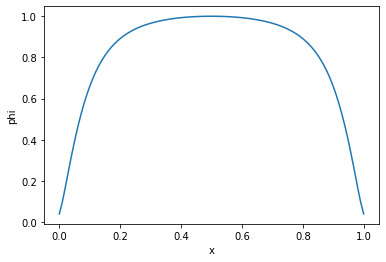

In [10]:
# Plotting the solution

plt.plot(x, phi)
plt.xlabel('x')
plt.ylabel('phi')
plt.show()